First attempt at created a gibbs sampler for a normal distro in python

In [2]:
import pandas as pd
import numpy as np
import pymc3
import math
import matplotlib.pyplot as plt

In [8]:
#SETUP

#gen random data
#true mu and sigma
mu = 0
sigma = 1
data = np.random.normal(mu, sigma, 500)
n = data.shape[0]

burnin = 5000
draws = 10000
tot_iters = burnin + draws 

#somewhere to store our draws
mu_draws = np.zeros(tot_iters)
sigma_draws = np.zeros(tot_iters)

#temp first values to be filled in with data 
mu_draws[0] = np.mean(data)
sigma_draws[0] = np.var(data)
mu_init = mu_draws[0]
sigma_init = sigma_draws[0]

#priors
mu = 0.1
sigma = 0.5
a = 0.01
b = 0.01

for i in range(1,tot_iters):
    #mu|sigma, data

    A  = np.sum(data)/sigma_init + mu/sigma
    B  = n/ + 1/sigma
    mu_temp = np.random.normal(A/B, 1/math.sqrt(B), 1)[0]

    #sigma|mu, data

    A  = n/2 + a
    B  = np.sum((data - mu_init) ** 2)/2 + b
    sigma_temp = 1/np.random.gamma(A, 1/B, 1)[0]

    # keep track of the results
    mu_draws[i] = mu_temp
    sigma_draws[i] = sigma_temp
    

print("mu")
print(mu_draws[:10])    
print(mu_draws[14990:])

#something is wrong with the way I'm calculating sigma
print("sigma")
print(sigma_draws[:10])    
print(sigma_draws[14990:])

mu
[-0.02401736 -0.04240303 -0.03272583 -0.02820255 -0.02640614 -0.04257018
  0.00151057 -0.02009142 -0.04386103  0.02284852]
[-0.01173123  0.02707168 -0.04892707  0.01162514 -0.01361632 -0.05392114
  0.03812297 -0.03895299 -0.01823919  0.01435117]
sigma
[0.97913049 1.00028804 0.97405109 1.01010892 0.99009897 0.96871305
 1.00168955 0.99029612 0.93475753 1.03111018]
[0.972928   1.08222685 1.07202016 1.02860164 0.93160431 0.9504863
 1.0958499  0.93791608 1.01915418 0.98493424]


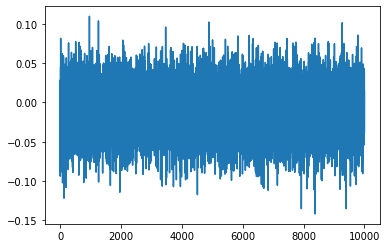

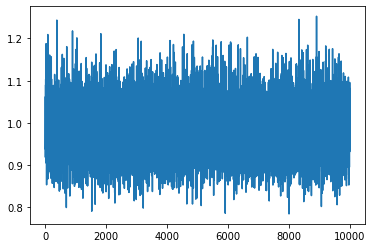

In [9]:
plt.figure()
plt.plot(mu_draws[5000:])
plt.show()
plt.close()

plt.figure()
plt.plot(sigma_draws[5000:])
plt.show()
plt.close()